In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

C:\Users\omkar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("IPL.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
def data_info(df):
    print('Total number of Matches Played:',df.shape[0]) # Total counts of Row's
    print('Dataset Features: ',df.shape[1])    #  Total count of column
    print('-'*70)
    print('dataset columns :\n') # All column_Name
    print(df.columns)
    print('-'*70)
    print('data-type of each column: \n')   # Data-Types of all Column's
    print(df.dtypes)
    print('-'*70)
    print('Missing rows in each column: \n')
    c=df.isnull().sum()     # Display Only Null-VAlue's
    print(c[c>0])
    print('-'*70)
    print('Number of Inning Teams played in league : \n')
    Teams = df['batting_team'].value_counts()
    print(Teams)
    

In [4]:
data_info(df)

Total number of Matches Played: 150460
Dataset Features:  21
----------------------------------------------------------------------
dataset columns :

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
----------------------------------------------------------------------
data-type of each column: 

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64


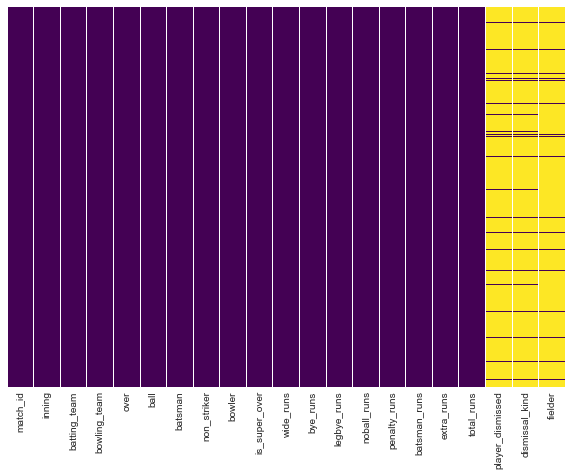

In [5]:
# Null-Values using the Heat-Map 
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
# Yellow Lines are Heat-Map

As we can see  
player_dismissed    143022

dismissal_kind      143022

fielder             145091.

has Large amount of Null-Values so we can replace it with 'UNKNOWN' because 3Features in Object Form
              
               

In [6]:
df['player_dismissed'].fillna('Unknown',inplace=True)

In [7]:
df['dismissal_kind'].fillna('Unknown',inplace=True)

In [8]:
df['fielder'].fillna('Unknown',inplace=True)

In [9]:
df["dismissal_kind"].value_counts()

Unknown                  143022
caught                     4373
bowled                     1382
run out                     755
lbw                         455
stumped                     243
caught and bowled           211
hit wicket                    9
retired hurt                  9
obstructing the field         1
Name: dismissal_kind, dtype: int64

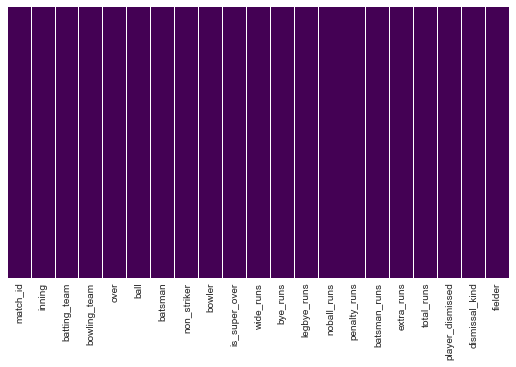

In [10]:
# Null-Values Replace with the Unknown 
plt.figure(figsize=(9,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
Top5_BL = df['bowler'].value_counts()
Top5_BL.head()

Harbhajan Singh    2989
A Mishra           2703
SL Malinga         2694
P Kumar            2637
PP Chawla          2594
Name: bowler, dtype: int64

In [12]:
Top5_BT= df['batsman'].value_counts()
Top5_BT.head(5)

V Kohli      3494
G Gambhir    3433
SK Raina     3369
RG Sharma    3274
S Dhawan     3005
Name: batsman, dtype: int64

In [13]:
H_Singh = df.loc[(df["bowler"] == "Harbhajan Singh")]
A_Mishra=df.loc[(df["bowler"] == "A Mishra")]
SL_Malinga = df.loc[(df["bowler"]=="SL Malinga")]
P_Kumar = df.loc[(df["bowler"]=="P Kumar")]
PP_Chawla = df.loc[(df["bowler"]=="PP Chawla")]

In [14]:
# Value-Count of Harbhjan_Singh
Wickets_H_Singh = H_Singh['dismissal_kind'].value_counts()

# Value-Count of A_Mishra
Wickets_A_Mishra = A_Mishra['dismissal_kind'].value_counts()

# Value-Count of SL_Malinga
Wickets_SL_Malinga = SL_Malinga['dismissal_kind'].value_counts()

# Value-Count of P_Kumar
Wickets_P_Kumar = P_Kumar['dismissal_kind'].value_counts()

# Value-Count of PP_Chawla
Wickets_PP_Chawla = PP_Chawla['dismissal_kind'].value_counts()


In [15]:
Wickets_H_Singh

Unknown              2853
caught                 68
bowled                 26
stumped                14
caught and bowled      10
run out                 9
lbw                     8
hit wicket              1
Name: dismissal_kind, dtype: int64

In [16]:
Wickets_A_Mishra

Unknown              2561
caught                 74
stumped                23
bowled                 21
lbw                    13
run out                 8
caught and bowled       3
Name: dismissal_kind, dtype: int64

In [17]:
Wickets_SL_Malinga

Unknown              2524
caught                 76
bowled                 63
run out                16
lbw                    10
caught and bowled       5
Name: dismissal_kind, dtype: int64

In [18]:
Wickets_P_Kumar

Unknown              2535
caught                 70
bowled                 14
run out                12
lbw                     5
caught and bowled       1
Name: dismissal_kind, dtype: int64

In [19]:
Wickets_PP_Chawla

Unknown              2461
caught                 57
bowled                 37
lbw                    15
stumped                13
run out                 7
caught and bowled       4
Name: dismissal_kind, dtype: int64

## Top 5 Runere's

In [20]:
Top = df.groupby(['batsman'])['batsman_runs'].sum()

In [21]:
B1=Top.nlargest(5)
B1

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

## Raina Average run

In [22]:
Raina_avg = df.loc[df["batsman"] == "SK Raina"].groupby("match_id")["batsman_runs"].sum()

In [23]:
Raina_avg.mean()

28.96815286624204

## Top 5 Wicket-Takers

In [24]:
WK = df.groupby(['bowler'])['dismissal_kind'].count()

In [25]:
WK.nlargest(5)

bowler
Harbhajan Singh    2989
A Mishra           2703
SL Malinga         2694
P Kumar            2637
PP Chawla          2594
Name: dismissal_kind, dtype: int64

### 5 Highest  score runs

In [26]:
Total_Runs = df.groupby(['match_id','inning'])['total_runs'].sum()

In [27]:
Total_Runs.nlargest(5)

match_id  inning
411       1         263
620       1         248
206       1         246
61        1         240
562       1         235
Name: total_runs, dtype: int64

### Average rate of Chris Gayle

In [46]:
Chris_ = df.loc[df["batsman"]=="chris gayle"].groupby("match_id")["batsman_runs"],np.rate

In [47]:
Chris

(<pandas.core.groupby.generic.SeriesGroupBy object at 0x13F9E950>,
 <function numpy.rate(nper, pmt, pv, fv, when='end', guess=None, tol=None, maxiter=100)>)